#📌 1. Extracão

In [29]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

# Normalizar JSON
df = pd.json_normalize(data)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [30]:
# Ver um exemplo de linha
df.iloc[0]

,0
customerID,0002-ORFBO
Churn,No
customer.gender,Female
customer.SeniorCitizen,0
customer.Partner,Yes
customer.Dependents,Yes
customer.tenure,9
phone.PhoneService,Yes
phone.MultipleLines,No
internet.InternetService,DSL


#🔧 2. Transformação

In [31]:
import numpy as np

# **2.1. Explorar as colunas e tipos de dados**

In [32]:
# Ver colunas e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

# **2.2. Analisar Variáveis**

**Churn:** variável-alvo que queremos prever

**Charges.Monthly, Charges.Total, tenure:** variáveis numéricas que indicam valor pago e tempo como cliente

**Contract, PaymentMethod, InternetService:** variáveis categóricas que podem influenciar a saída

# **2.3. Identificar as colunas mais relevantes para análise de evasão (churn)**

Com base no domínio e na estrutura dos dados, as colunas com maior potencial explicativo para Churn são:


### Principais candidatos

| Variável                          | Por que pode ser importante                                   |
|----------------------------------|----------------------------------------------------------------|
| `tenure`                         | Clientes com pouco tempo tendem a sair mais                   |
| `Contract`                       | Contratos mensais têm maior risco de evasão                   |
| `Charges.Monthly`               | Contas altas podem levar à insatisfação                       |
| `PaymentMethod`                  | Pagamentos automáticos reduzem a evasão                       |
| `InternetService`                | Tipo de internet influencia a satisfação                      |
| `TechSupport`, `OnlineSecurity`  | Serviços adicionais tendem a reduzir churn                   |
| `StreamingTV`, `StreamingMovies` | Pode indicar engajamento com os serviços                      |


### Perfil do cliente

- `SeniorCitizen`, `Partner`, `Dependents`, `gender`: características demográficas que podem influenciar o churning.


# **2.4. Verificar Inconsistência nos Dados**

In [33]:
# Verificar quantidade de valores ausentes por coluna
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [34]:
# Ver porcentagem de valores ausentes
df.isnull().mean().sort_values(ascending=False)

,0
customerID,0.0
Churn,0.0
customer.gender,0.0
customer.SeniorCitizen,0.0
customer.Partner,0.0
customer.Dependents,0.0
customer.tenure,0.0
phone.PhoneService,0.0
phone.MultipleLines,0.0
internet.InternetService,0.0


# **2.5. Verificar linhas duplicadas**


In [35]:
# Verificar se há linhas duplicadas
df.duplicated().sum()

# Exibir as linhas duplicadas (se existirem)
df[df.duplicated()]


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


# **2.6. Verificar Erros de formatação**


In [36]:
# Ver tipos de dados
df.dtypes

# Exemplo: converter 'account.Charges.Total' de string para float
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


# **2.7. Verificar inconsistências em colunas categóricas**

In [37]:
# Exemplo: ver categorias únicas da coluna 'PaymentMethod'
df['account.PaymentMethod'].unique()


array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [38]:
# Limpeza comum: remover espaços e padronizar capitalização
df['account.PaymentMethod'] = df['account.PaymentMethod'].str.strip().str.title()

In [39]:
# Contar strings vazias
(df == '').sum()


,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [42]:
# Substituir strings vazias
df['Churn'].fillna('No', inplace=True)



<ipython-input-42-154e9876ba17>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].fillna('No', inplace=True)


# **2.8. Criar a coluna "Contas_Diarias".**

Utilizando o faturamento mensal para calcular o valor diário, proporcionando uma visão mais detalhada do comportamento dos clientes ao longo do tempo.

In [44]:
# Criar coluna 'Contas_Diarias' com base no valor mensal dividido por 30
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30


In [45]:
# Visualizar as 5 primeiras linhas
df[['account.Charges.Monthly', 'Contas_Diarias']].head()

,account.Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


# **2.9. Padronizar os dados**

Converter valores textuais como "Sim" e "Não" em valores binários (1 e 0 para facilitar o processamento matemático e a aplicação de modelos analíticos.

In [59]:
import numpy as np

# Lista de colunas a serem convertidas para 0 e 1
cols_to_convert = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]

# Limpeza preventiva: remover espaços extras
for col in cols_to_convert:
    df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)


# Mapeamento dos valores
map_bin = {
    'Yes': 1,
    'No': 0,
     '': 0,
    'No internet service': 0,
    'No phone service': 0
}

# Aplicar a conversão
for col in cols_to_convert:
    df[col] = df[col].replace(map_bin)

# Convert to integer safely
df['Churn'] = df['Churn'].astype('Int64')  # or use .astype(int) if no NaN

<ipython-input-59-365fa833a1a5>:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(map_bin)


In [55]:
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed Check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed Check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic Check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic Check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed Check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed Check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic Check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed Check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed Check,67.85,4627.65,2.261667


#📊 3. Carga e análise

# **3.1. Análise Descritiva**


Realizar uma análise descritiva dos dados, calculando métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

In [50]:
df.describe()


,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2280.634213,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


# **3.2. Distribuição da Evasão**

Neste passo, o objetivo é entender como a variável "churn" (evasão) está distribuída entre os clientes. Utilize gráficos para visualizar a proporção de clientes que permaneceram e os que saíram.

## **Exemplo com Gráfico de Barras**

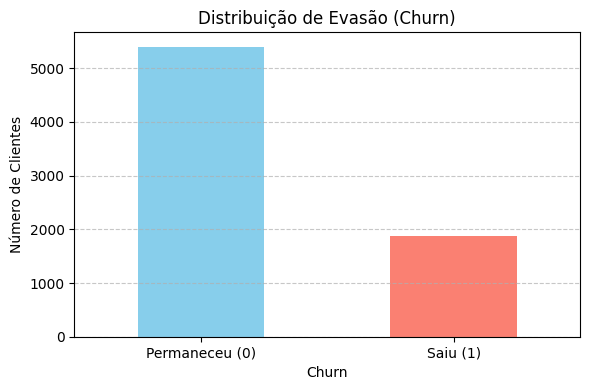

In [61]:
import matplotlib.pyplot as plt

# Contagem de churn
churn_counts = df['Churn'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição de Evasão (Churn)')
plt.xticks(ticks=[0,1], labels=['Permaneceu (0)', 'Saiu (1)'], rotation=0)
plt.ylabel('Número de Clientes')
plt.xlabel('Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Exemplo com Gráfico de Pizza**

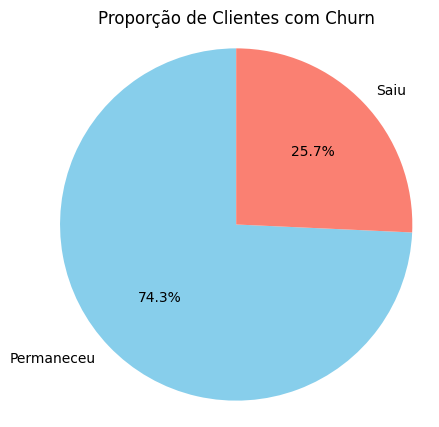

In [62]:
# Labels e dados
labels = ['Permaneceu', 'Saiu']
sizes = df['Churn'].value_counts().sort_index()

# Plot
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Proporção de Clientes com Churn')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle.
plt.show()


# **Contagem de Evasão por Variáveis Categóricas**
Vamos explorar a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.

Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.

In [76]:
# Obtendo os nomes das colunas
print(df.columns.tolist())

['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias']


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

def churn_by_category(col):
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'Churn por {col}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Número de Clientes')
    plt.xlabel(col)
    plt.legend(title='Churn', labels=['Permaneceu (0)', 'Saiu (1)'])
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

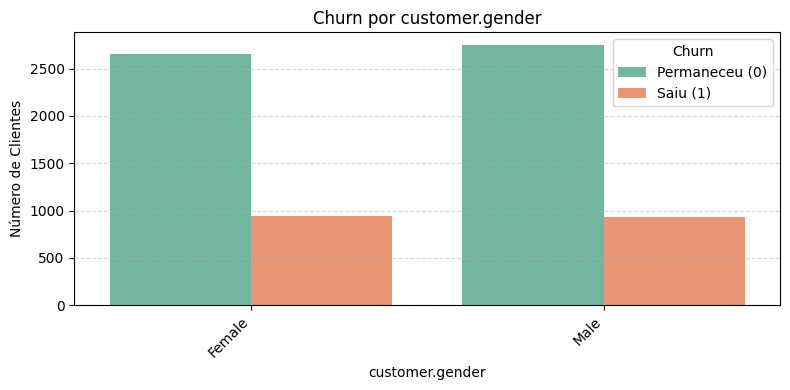

In [65]:
# Churn por gênero
churn_by_category('customer.gender')

['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias']


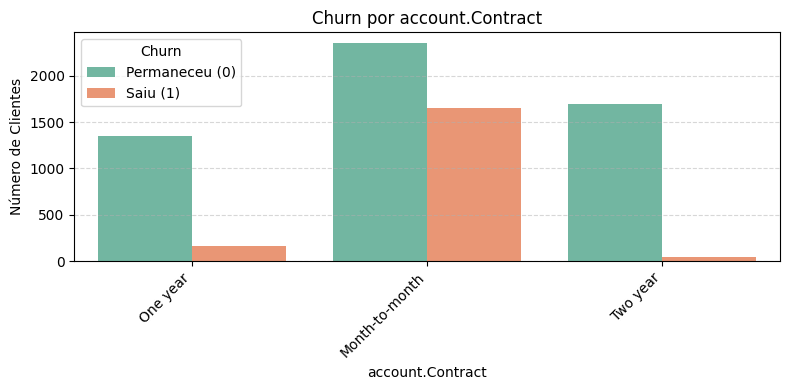

In [75]:
churn_by_category('account.Contract')

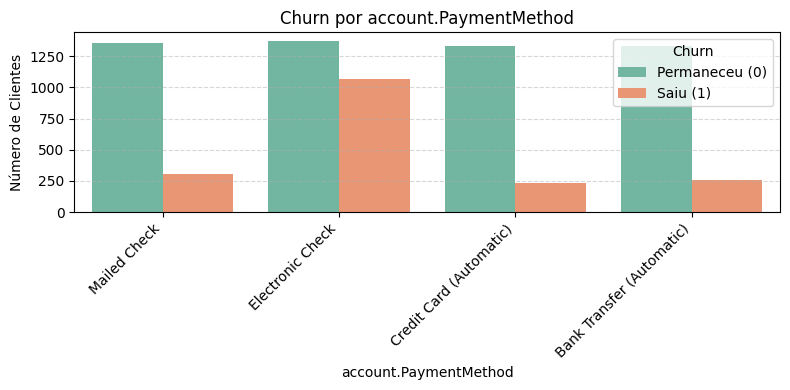

In [67]:
churn_by_category('account.PaymentMethod')


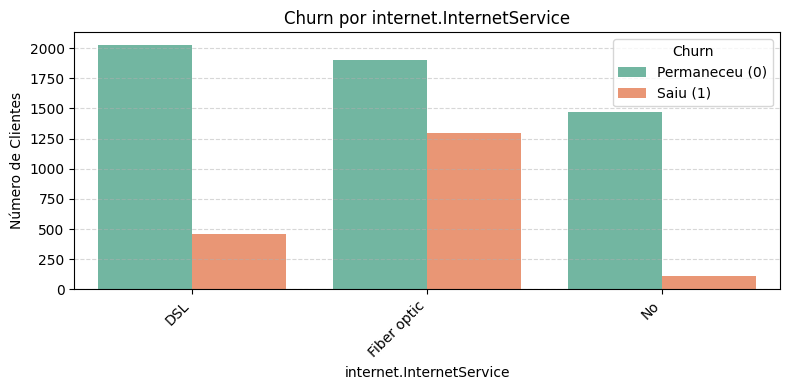

In [68]:
churn_by_category('internet.InternetService')

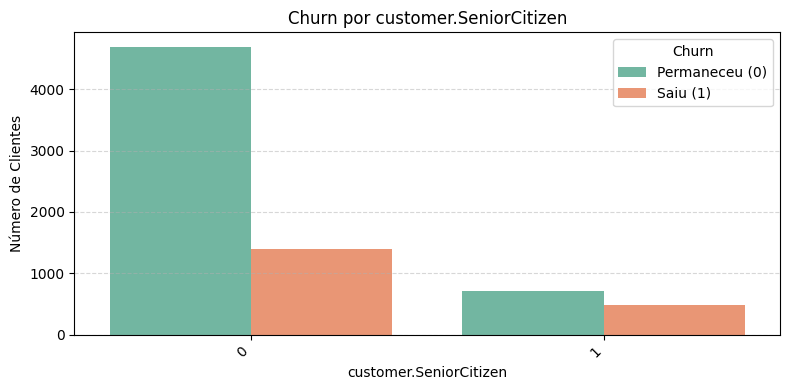

In [69]:
churn_by_category('customer.SeniorCitizen')

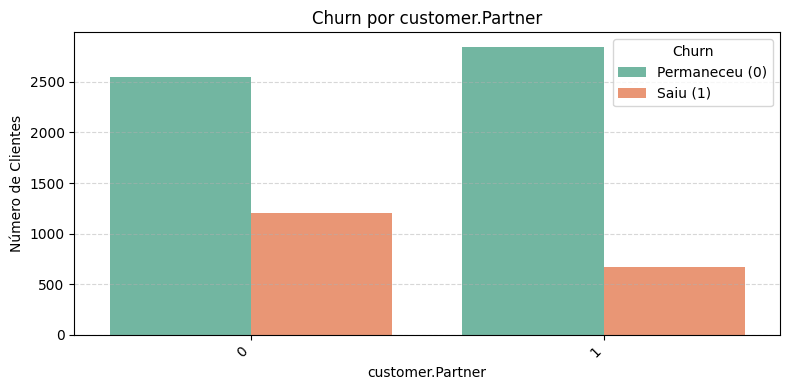

In [70]:
churn_by_category('customer.Partner')

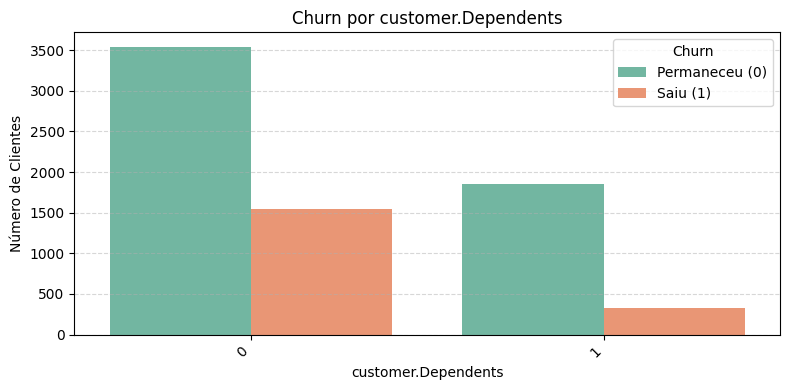

In [71]:
churn_by_category('customer.Dependents')

# **Contagem de Evasão por Variáveis Numéricas**

Explorando como variáveis numéricas, como "total gasto" ou "tempo de contrato", se distribuem entre clientes que cancelaram (evasão) e os que não cancelaram. Essa análise ajuda a entender se certos valores numéricos estão mais associados à evasão, oferecendo insights sobre os fatores que influenciam o comportamento dos clientes.

<ipython-input-77-c19d9ce77936>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set2')


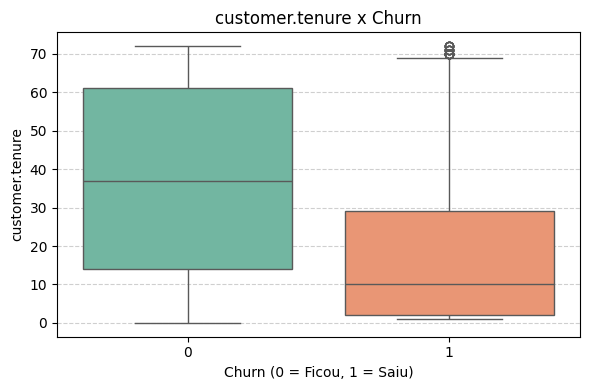

<ipython-input-77-c19d9ce77936>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set2')


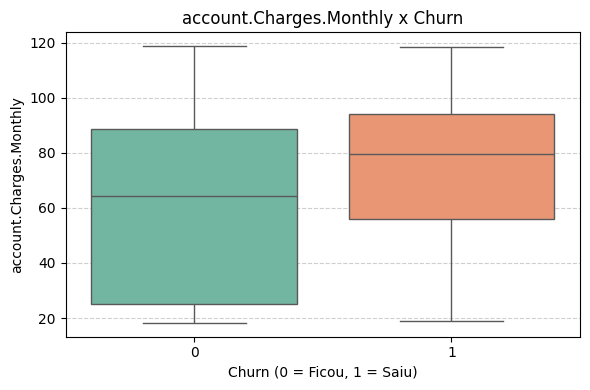

<ipython-input-77-c19d9ce77936>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set2')


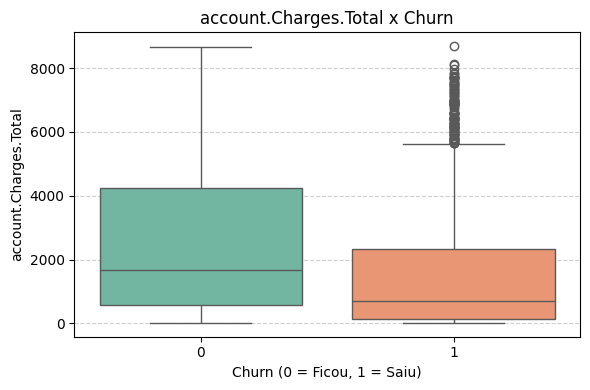

<ipython-input-77-c19d9ce77936>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set2')


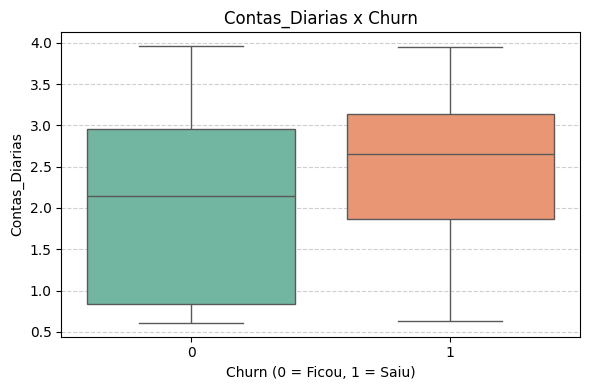

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

def churn_boxplot(col):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Churn', y=col, palette='Set2')
    plt.title(f'{col} x Churn')
    plt.xlabel('Churn (0 = Ficou, 1 = Saiu)')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Exemplos:
churn_boxplot('customer.tenure')
churn_boxplot('account.Charges.Monthly')
churn_boxplot('account.Charges.Total')
churn_boxplot('Contas_Diarias')


# **4. Atividade Extra**

# **4.1. Calcular correlação com Churn**

In [78]:
# Calcular correlação com a variável Churn
correlacoes = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)
correlacoes


,Churn
Churn,1.000000
Contas_Diarias,0.189866
account.Charges.Monthly,0.189866
account.PaperlessBilling,0.186666
customer.SeniorCitizen,0.146733
internet.StreamingTV,0.062430
internet.StreamingMovies,0.060586
phone.MultipleLines,0.039343
phone.PhoneService,0.012571
internet.DeviceProtection,-0.063452


<ipython-input-79-21b4f4df7ea1>:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


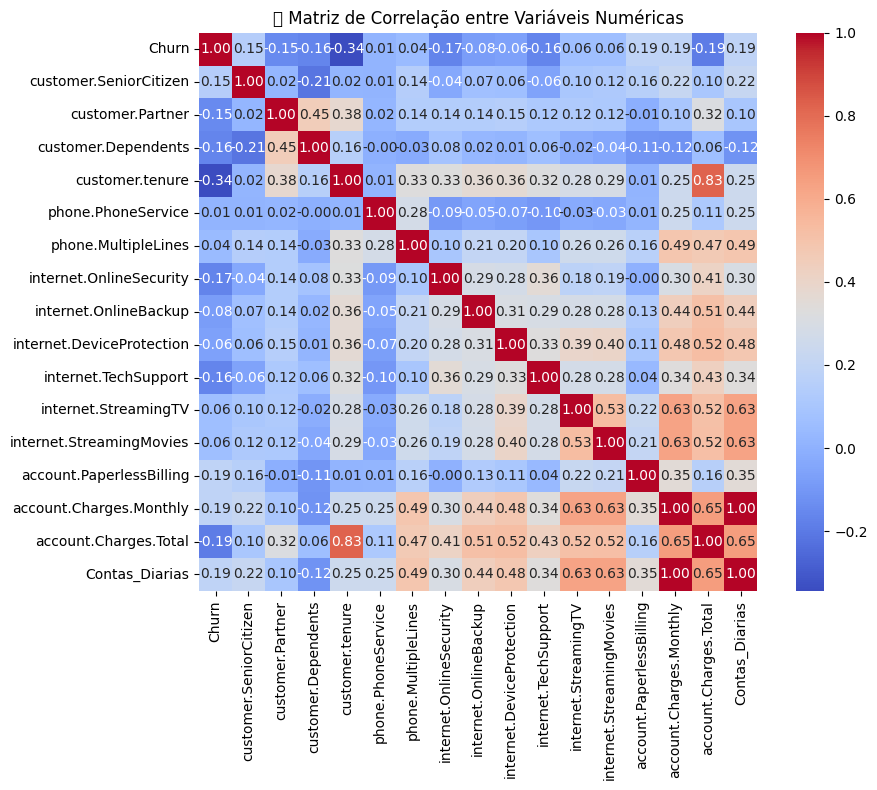

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação apenas com colunas numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('📊 Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()


A correlação entre "Tenure" e o "ChargesTotal" de 0,83 demonstra que Clientes com mais tempo de contrato (tenure) tendem a ter um gasto total (Charges.Total) maior.

#📄5. Relatorio Final

# 📊 5.1. Análise de Evasão de Clientes (Churn) – TelecomX

---

## 📌 5.1.1. Introdução

Este projeto tem como objetivo analisar o comportamento dos clientes da empresa **TelecomX** e entender os fatores que contribuem para a **evasão de clientes (Churn)**.

A evasão representa os clientes que **cancelaram seus serviços**, o que impacta diretamente na receita e sustentabilidade da empresa. Ao identificar padrões associados ao cancelamento, podemos propor ações estratégicas para aumentar a retenção e melhorar o relacionamento com os clientes.

---

## 🧼 5.1.2. Limpeza e Tratamento de Dados

A base de dados foi importada de um arquivo `.json` com estrutura aninhada. Os principais passos de limpeza e transformação foram:

- **Normalização do JSON**: uso de `pd.json_normalize()` para transformar a estrutura em um DataFrame tabular.
- **Tratamento de valores ausentes**: substituição de strings vazias por `NaN` e preenchimento ou exclusão conforme o contexto.
- **Conversão de variáveis**:
  - Colunas com valores `"Yes"` / `"No"` foram transformadas em binárias (`1` / `0`).
  - Gasto total (`Charges.Total`) foi convertido de string para `float`.
- **Criação da coluna `Contas_Diarias`**: valor médio diário baseado no gasto mensal.

---

## 🔎 5.1.3. Análise Exploratória de Dados (EDA)

### ✔ Distribuição Geral de Churn

A maioria dos clientes permanece na base, mas há uma proporção significativa de evasão:

*Gráfico de barras ou pizza mostrando a proporção entre Churn = 0 e Churn = 1.*

---

### ✔ Evasão por Variáveis Categóricas

Analisamos como o churn se comporta em relação a diferentes características dos clientes:

- **Contrato mensal** apresenta maior taxa de evasão.
- **Clientes que não têm parceiro ou dependentes** têm maior propensão ao churn.
- **Pagamentos por boleto eletrônico** estão mais associados ao cancelamento.
- **Serviços adicionais como segurança online e suporte técnico** ajudam na retenção.

*Gráficos de barras para: Contract, PaymentMethod, Partner, Dependents, InternetService, etc.*

---

### ✔ Evasão por Variáveis Numéricas

- Clientes que **saem** tendem a ter **tempo de contrato (`tenure`) mais curto**.
- Gasto mensal não tem uma diferença tão clara, mas clientes com menor `Charges.Total` tendem a sair mais, sugerindo que **clientes recentes ou menos engajados cancelam com mais frequência**.

*Boxplots e histogramas para: `tenure`, `Charges.Monthly`, `Charges.Total`, `Contas_Diarias`.*

---

## 📈 5.1.4. Conclusões e Insights

- A **maior parte da evasão ocorre nos primeiros meses de contrato**.
- **Contratos mensais e falta de serviços adicionais** (como suporte técnico) estão fortemente associados ao churn.
- **Clientes com menor envolvimento** (sem parceiro, dependentes ou poucos serviços ativos) tendem a sair mais.
- Pagamentos **manuais** estão mais associados à evasão do que pagamentos automáticos.

---

## 💡 5.1.5. Recomendações

Com base nas análises, sugerimos:

- **Incentivar contratos anuais ou bianuais** com vantagens financeiras.
- **Oferecer serviços adicionais (segurança, suporte)** como bônus para clientes novos.
- **Intervenções preventivas nos primeiros meses de contrato**, como check-ins e ofertas especiais.
- **Promover pagamentos automáticos** com desconto ou cashback.
- **Monitorar clientes com perfis de risco** (baixo tempo de contrato, pagamentos manuais, sem serviços adicionais).

---

> 📌 Com esse diagnóstico, a empresa pode tomar decisões mais orientadas por dados para **reduzir a evasão e aumentar a retenção de clientes**.
